# Cats and dogs second try 

## Data augmentation and Transfer learning

In [20]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

import os

2.15.0


In [21]:
base_dir = '/home/mstorresh/ML/libro_Jordi/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [22]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


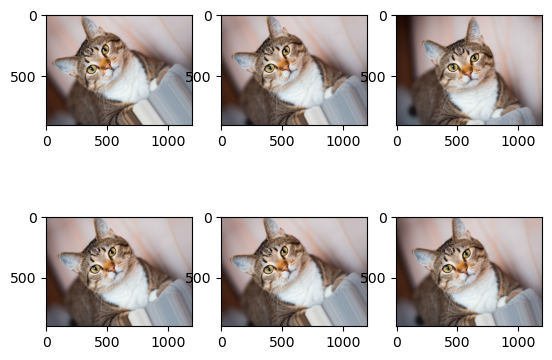

In [23]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

from tensorflow.keras.preprocessing import image

uploaded ='gatocom.jpg'

path='/home/mstorresh/ML/libro_Jordi/' + uploaded
img=image.load_img(path)
data = img_to_array(img)
samples = expand_dims(data, 0)
  
  # example of "rotation_range"
datagen = ImageDataGenerator(rotation_range=45)

it = datagen.flow(samples, batch_size=1)
for i in range(6):
    pyplot.subplot(230 + 1 + i)
    batch = it.next() 
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
    
pyplot.show()

## Model from data augmentation

In [24]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 


model_data = Sequential()
model_data.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model_data.add(MaxPooling2D(2,2))
model_data.add(Conv2D(64, (3,3), activation='relu'))
model_data.add(Dropout(0.25))
model_data.add(MaxPooling2D(2,2))
model_data.add(Conv2D(128, (3,3), activation='relu'))
model_data.add(MaxPooling2D(2,2))
model_data.add(Dropout(0.25))
model_data.add(Conv2D(128, (3,3), activation='relu'))
model_data.add(MaxPooling2D(2,2))
model_data.add(Flatten())
model_data.add(Dense(512, activation='relu'))
model_data.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model_data.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_datagen = ImageDataGenerator( rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150,150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size = 20,
                                                              class_mode = 'binary',
                                                              target_size = (150,150))

test_generator = test_datagen.flow_from_directory(validation_dir,
                                                  batch_size = 20,
                                                  class_mode = 'binary',
                                                  target_size = (150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
batch_size: int = 20 
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

train_generator.n

2000

In [27]:
history_data = model_data.fit(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs = 20,
                              validation_data = validation_generator,
                              validation_steps = validation_steps,
                              verbose = 2)

Epoch 1/20
100/100 - 44s - loss: 0.6945 - acc: 0.5140 - val_loss: 0.6917 - val_acc: 0.5380 - 44s/epoch - 444ms/step
Epoch 2/20
100/100 - 42s - loss: 0.6891 - acc: 0.5420 - val_loss: 0.6843 - val_acc: 0.5810 - 42s/epoch - 418ms/step
Epoch 3/20
100/100 - 37s - loss: 0.6796 - acc: 0.5515 - val_loss: 0.6672 - val_acc: 0.6160 - 37s/epoch - 374ms/step
Epoch 4/20
100/100 - 36s - loss: 0.6562 - acc: 0.6070 - val_loss: 0.6486 - val_acc: 0.6040 - 36s/epoch - 364ms/step
Epoch 5/20
100/100 - 37s - loss: 0.6396 - acc: 0.6355 - val_loss: 0.6151 - val_acc: 0.6600 - 37s/epoch - 365ms/step
Epoch 6/20
100/100 - 37s - loss: 0.6161 - acc: 0.6525 - val_loss: 0.5938 - val_acc: 0.6720 - 37s/epoch - 370ms/step
Epoch 7/20
100/100 - 40s - loss: 0.6079 - acc: 0.6695 - val_loss: 0.5990 - val_acc: 0.6730 - 40s/epoch - 405ms/step
Epoch 8/20
100/100 - 42s - loss: 0.5966 - acc: 0.6735 - val_loss: 0.5814 - val_acc: 0.7140 - 42s/epoch - 423ms/step
Epoch 9/20
100/100 - 42s - loss: 0.5913 - acc: 0.6745 - val_loss: 0.5742

In [28]:
print (steps_per_epoch)
print (validation_steps)
test_lost, test_acc= model_data.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

100
50
50/50 [==============================] - 6s 106ms/step - loss: 0.5186 - acc: 0.7580
Test Accuracy: 0.7580000162124634


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

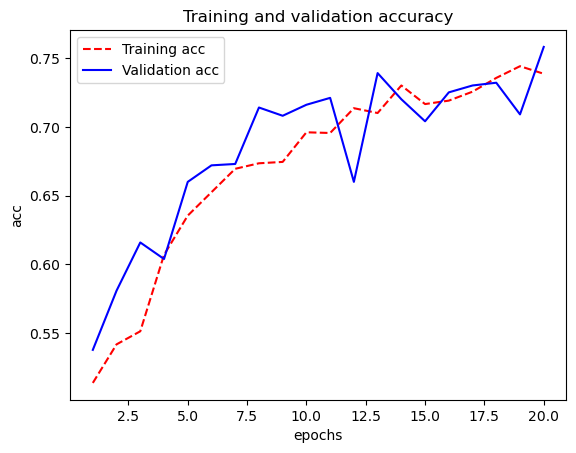

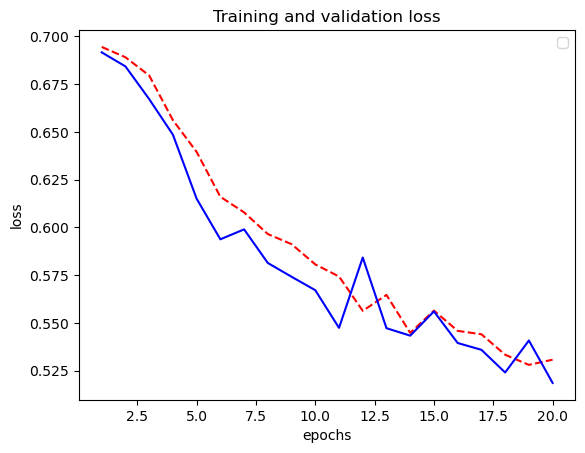

<Figure size 640x480 with 0 Axes>

In [29]:

import matplotlib.pyplot as plt


acc      = history_data.history[     'acc' ]
val_acc  = history_data.history[ 'val_acc' ]
loss     = history_data.history[    'loss' ]
val_loss = history_data.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()


## ModelFE: Model with Feature Extraction 

In [30]:
from tensorflow.keras.applications import VGG16 

pre_trained_model = VGG16(input_shape = (150, 150, 3),
                          include_top = False, # THis is not to take the last layers (the ones that discriminate)
                          weights = 'imagenet')

pre_trained_model.summary()

for layer in pre_trained_model.layers:
    layer.trainable = False  # to no update the weights of the imported layers
    
pre_trained_model.summary()

# we have 5 blocks (2 conv and 1 maxpooling) 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Creating our classifier 

In [31]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelFE = Sequential()
modelFE.add(pre_trained_model)
modelFE.add(Flatten())
modelFE.add(Dense(256, activation='relu'))
modelFE.add(Dense(1, activation='sigmoid'))


modelFE.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [32]:
# doing data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))





Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
from tensorflow.keras.optimizers import Adam

modelFE.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=1e-4),
                metrics=['acc'])

batch_size = 20 

steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFE = modelFE.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 20,
            validation_steps = validation_steps,
            verbose = 2)


Epoch 1/20
100/100 - 165s - loss: 0.4981 - acc: 0.7485 - val_loss: 0.3203 - val_acc: 0.8650 - 165s/epoch - 2s/step
Epoch 2/20
100/100 - 160s - loss: 0.3920 - acc: 0.8090 - val_loss: 0.2721 - val_acc: 0.8920 - 160s/epoch - 2s/step
Epoch 3/20
100/100 - 160s - loss: 0.3546 - acc: 0.8465 - val_loss: 0.2515 - val_acc: 0.8960 - 160s/epoch - 2s/step
Epoch 4/20
100/100 - 156s - loss: 0.3284 - acc: 0.8540 - val_loss: 0.2475 - val_acc: 0.8960 - 156s/epoch - 2s/step
Epoch 5/20
100/100 - 161s - loss: 0.3367 - acc: 0.8445 - val_loss: 0.2520 - val_acc: 0.8980 - 161s/epoch - 2s/step
Epoch 6/20
100/100 - 163s - loss: 0.3273 - acc: 0.8500 - val_loss: 0.2372 - val_acc: 0.9000 - 163s/epoch - 2s/step
Epoch 7/20
100/100 - 167s - loss: 0.3061 - acc: 0.8670 - val_loss: 0.2374 - val_acc: 0.9020 - 167s/epoch - 2s/step
Epoch 8/20
100/100 - 168s - loss: 0.3186 - acc: 0.8640 - val_loss: 0.2313 - val_acc: 0.9100 - 168s/epoch - 2s/step
Epoch 9/20
100/100 - 170s - loss: 0.3080 - acc: 0.8675 - val_loss: 0.2301 - val_

In [34]:
test_lost, test_acc= modelFE.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

50/50 [==============================] - 49s 986ms/step - loss: 0.2284 - acc: 0.9070
Test Accuracy: 0.9070000052452087


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

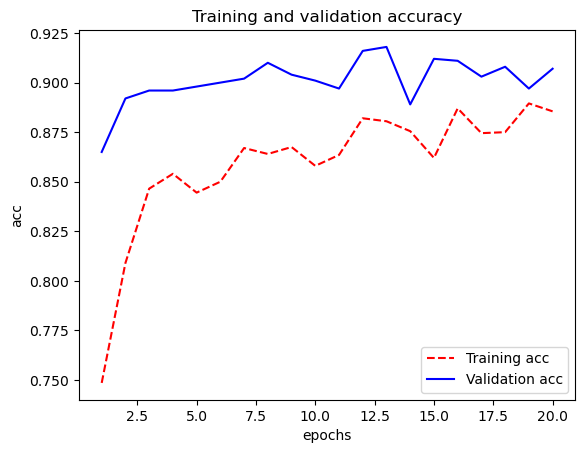

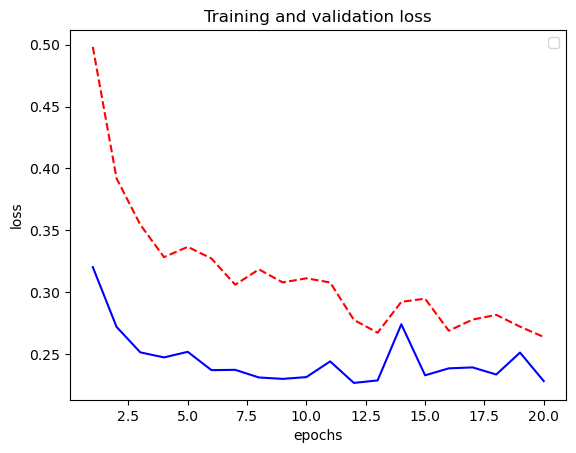

<Figure size 640x480 with 0 Axes>

In [35]:

import matplotlib.pyplot as plt


acc      = historyFE.history[     'acc' ]
val_acc  = historyFE.history[ 'val_acc' ]
loss     = historyFE.history[    'loss' ]
val_loss = historyFE.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.ylim(0,1)

plt.legend()
plt.figure()


### ModelFT: Model with Fine Tuning

In [36]:
# This is because we have to re weight the last block of the imported NN,
# to make more sense with the layer that we created

from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable: 
    layer.trainable = True
  else:
    layer.trainable = False

pre_trained_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [37]:
modelFT = Sequential()
modelFT.add(pre_trained_model)
modelFT.add(Flatten())
modelFT.add(Dense(256, activation='relu'))
modelFT.add(Dense(1, activation='sigmoid'))


modelFT.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 9177089 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [38]:
from tensorflow.keras.optimizers import Adam

modelFT.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4), 
              metrics=['acc'])

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFT = modelFT.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 20,
            validation_steps = validation_steps,
            verbose = 2)


Epoch 1/20
100/100 - 182s - loss: 0.4529 - acc: 0.7695 - val_loss: 0.2328 - val_acc: 0.9000 - 182s/epoch - 2s/step
Epoch 2/20
100/100 - 175s - loss: 0.2684 - acc: 0.8870 - val_loss: 0.1940 - val_acc: 0.9190 - 175s/epoch - 2s/step
Epoch 3/20
100/100 - 172s - loss: 0.2368 - acc: 0.9055 - val_loss: 0.1696 - val_acc: 0.9200 - 172s/epoch - 2s/step
Epoch 4/20
100/100 - 171s - loss: 0.2049 - acc: 0.9180 - val_loss: 0.1918 - val_acc: 0.9180 - 171s/epoch - 2s/step
Epoch 5/20
100/100 - 154s - loss: 0.1710 - acc: 0.9375 - val_loss: 0.2033 - val_acc: 0.9170 - 154s/epoch - 2s/step
Epoch 6/20
100/100 - 159s - loss: 0.1645 - acc: 0.9300 - val_loss: 0.2383 - val_acc: 0.9120 - 159s/epoch - 2s/step
Epoch 7/20
100/100 - 181s - loss: 0.1643 - acc: 0.9390 - val_loss: 0.1660 - val_acc: 0.9330 - 181s/epoch - 2s/step
Epoch 8/20
100/100 - 167s - loss: 0.1296 - acc: 0.9540 - val_loss: 0.1879 - val_acc: 0.9280 - 167s/epoch - 2s/step
Epoch 9/20
100/100 - 171s - loss: 0.1271 - acc: 0.9510 - val_loss: 0.2080 - val_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

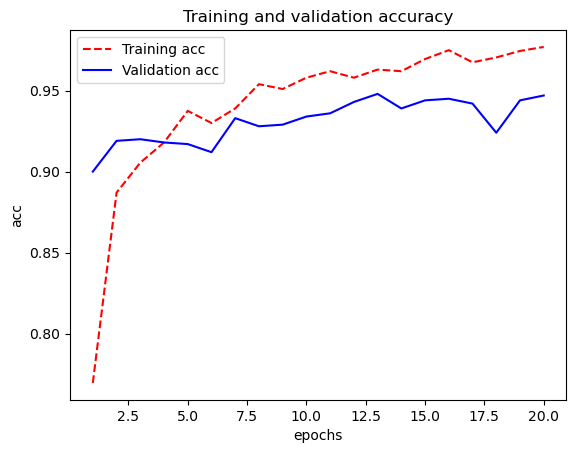

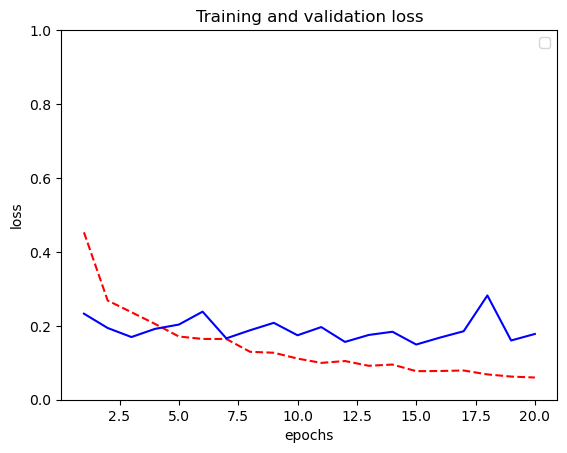

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt

acc      = historyFT.history[     'acc' ]
val_acc  = historyFT.history[ 'val_acc' ]
loss     = historyFT.history[    'loss' ]
val_loss = historyFT.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
plt.ylim(0,1)

plt.legend()
plt.figure()



In [42]:
test_lost, test_acc= modelFT.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

50/50 [==============================] - 29s 584ms/step - loss: 0.1779 - acc: 0.9470
Test Accuracy: 0.9470000267028809


<Figure size 640x480 with 0 Axes>

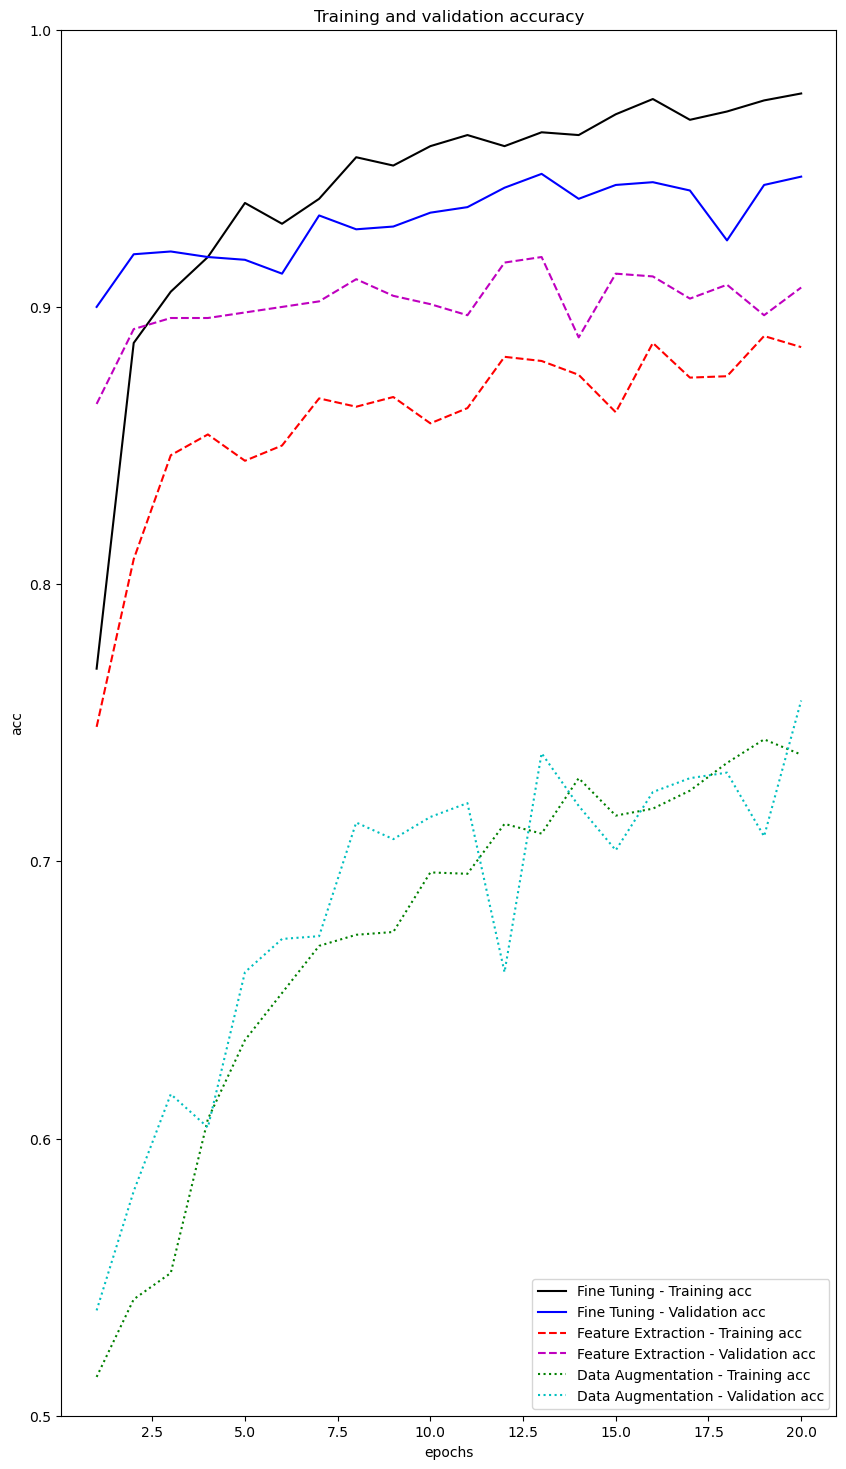

<Figure size 640x480 with 0 Axes>

In [43]:
accDA      = history_data.history[     'acc' ]
val_accDA  = history_data.history[ 'val_acc' ]

accFE      = historyFE.history[     'acc' ]
val_accFE  = historyFE.history[ 'val_acc' ]

accFT      = historyFT.history[     'acc' ]
val_accFT  = historyFT.history[ 'val_acc' ]

epochs    = range(1,len(accDA)+1,1) 

plt.figure(figsize=(10,18))

plt.plot  ( epochs,     accFT, 'k', label='Fine Tuning - Training acc '  )
plt.plot  ( epochs, val_accFT,  'b', label='Fine Tuning - Validation acc ')

plt.plot  ( epochs,     accFE, 'r--', label='Feature Extraction - Training acc'  )
plt.plot  ( epochs, val_accFE,  'm--', label='Feature Extraction - Validation acc')

plt.plot  ( epochs,     accDA, 'g:', label='Data Augmentation - Training acc'  )
plt.plot  ( epochs, val_accDA,  'c:', label='Data Augmentation - Validation acc')

plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.ylim(0.5,1)
plt.xlabel('epochs')


plt.legend()
plt.figure()





1/1 [==============================] - 1s 772ms/step
[[0.]]


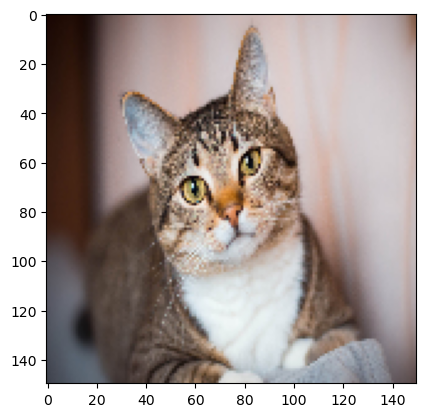

gatocom.jpg IS A CAT


In [44]:
import numpy as np

# from google.colab import files
from tensorflow.keras.preprocessing import image

# uploaded=files.upload()
file='gatocom.jpg'

path='/home/mstorresh/ML/libro_Jordi/' + file
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)  

classes = modelFT.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0: print( file + " IS A DOG")
else: print( file + " IS A CAT")